In [2]:
import numpy as np
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [5]:
xData = data['data']
yData = data['target']

In [6]:
xData.shape

(150, 4)

In [9]:
np.unique(yData, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [11]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

In [13]:
x_normalized = minmax_scale(xData)

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
pca = PCA()
pca.fit(x_normalized)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

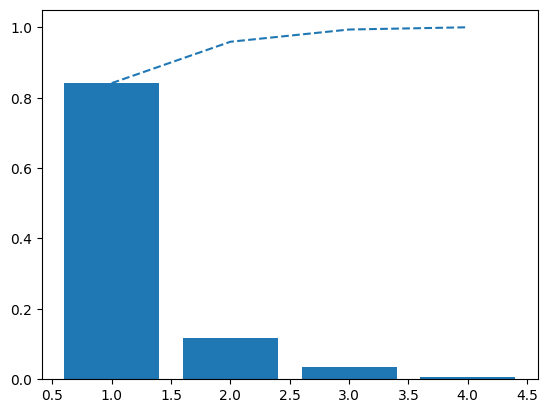

In [24]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), linestyle="--")

In [26]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normalized)

In [28]:
x_pca.shape

(150, 2)

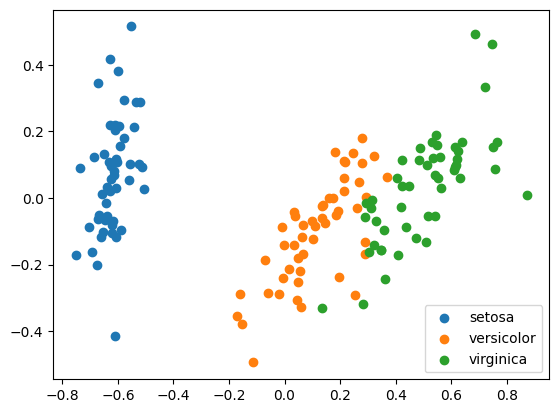

In [45]:
for i in np.unique(yData):
    idx = np.where(yData==i)[0]
    plt.scatter(x_pca[idx,0], x_pca[idx,1], label=data['target_names'][i])
plt.legend()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, train_size=0.8, stratify=yData, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [50]:
scaler = MinMaxScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [57]:
model = LogisticRegression()
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [58]:
model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [59]:
model = SVC()
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [63]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

